In [9]:
from pydataset import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [4]:
df = data("tips")
df


,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


## One Sample t-test Ex (compare subgroup to the pop)
- business question - are tips on Sun significantly diff than the rest of the wk?
- the null Hypothesis is that there is no diff
- the alt hypothesis is that there IS a diff

In [5]:
null_hypothesis = "Sunday tips are the same as the rest of the week"
alternate_hypothesis = "Sunday tips are different than the rest of the week's"
confidence_level = 0.95
alpha = 1 - confidence_level

In [6]:
#Make a subgroup for sunday
sunday = df[df.day == "Sun"]
sunday.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:>

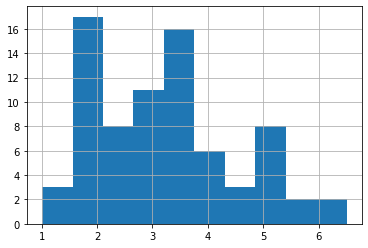

In [7]:
#let's take a look at the sunday tips
sunday.tip.hist()

<AxesSubplot:>

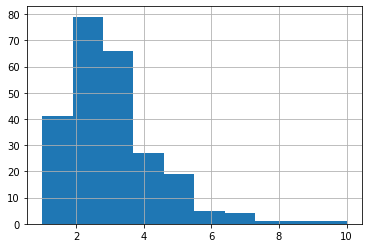

In [8]:
df.tip.hist()

In [10]:
#if you are doing a 1-tailed test, use the ttest_1samp function
t, p = stats.ttest_1samp(sunday.tip, df.tip.mean())

In [11]:
alpha

0.050000000000000044

In [12]:
p

0.0737884052452269

In [14]:
if p < alpha:
    print("We reject the null hypthesis")
    print("We move forward with thte alternative hypothesis that", alternate_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Failing to reject the null != 'accepting the null'")

We fail to reject the null hypothesis
Failing to reject the null != 'accepting the null'


In [15]:
null_hypothesis = "The means of total_bill are the same for smoker vs. nonsmoker."
alternative_hypothesis = "Smokers have a higher total_bill than non-smokers."
confidence_level = 0.95
a = 1 - confidence_level # call your shot before you run your test


In [ ]:
#let's compare the 2 pops visually
smokers = df[df.smoker == "Yes"]
non_smokers = df[df.smoker == "No"]

<AxesSubplot:>

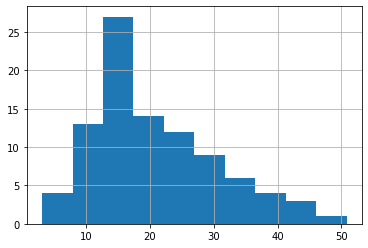

In [17]:
smokers.total_bill.hist()

<AxesSubplot:>

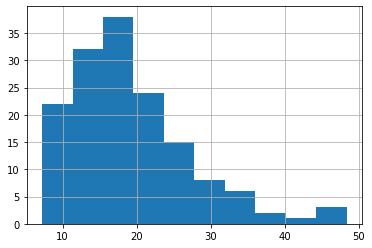

In [18]:
non_smokers.total_bill.hist()

In [19]:
#2sample b'c we're comparing the 2subgroups to each other
#sgl tail b'c we're checking if smokers total_bill is higher
#.ttest_ind test of independence ==2 sample t-test funct

t, p = stats.ttest_ind(smokers.total_bill, non_smokers.total_bill)
t, p

(1.3384363834700073, 0.1820103288430244)

In [20]:
#p/2 with t>0 is how we compare means if higher
if (p/2) < a and t > 0:
    print("Reject the null hypothesis.")
else: 
    print("We fail to reject the null hypothesis.")

We fail to reject the null hypothesis.


In [21]:
#keep the same setup and check if the means are different, regardless 
null_hypothesis = "the mean total_bill of nonsmokers and smokers is the same."
alternative_hypothesis = "The mean total_bill of nonsmokers and smokers is different."
# still 2sample b'c there are 2 subgroups and 2tailes b'c we're looking for any 

In [24]:
t, p = stats.ttest_ind(smokers.total_bill, non_smokers.total_bill)
t, p

(1.3384363834700073, 0.1820103288430244)

In [26]:
if p< a :
    print("Reject the null hypothesis that they are the same.")
    print("We move forward w/the alt hypothesis")
else: 
    print("We fail to reject the null hypothesis.")

We fail to reject the null hypothesis.


In [23]:
#We don't have sufficient evidence to support the claim that smokers and non have different bills.
